## Importing necessary modules

In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,5)})

import warnings
warnings.filterwarnings("ignore")

## Importing data

In [186]:
df = pd.read_csv('autos.csv')
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Data exploration

In [187]:
print('No.Rows:',df.shape[0])
print('No.Columns:',df.shape[1])

No.Rows: 371528
No.Columns: 21


In [188]:
df.drop(columns='index', inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [190]:
# Nulls in all columns.
for feature in df.columns:
    print('{}: {}%'.format(feature, round(df[feature].isna().sum() / df.shape[0], 2) * 100))

dateCrawled: 0.0%
name: 0.0%
seller: 0.0%
offerType: 0.0%
price: 0.0%
abtest: 0.0%
vehicleType: 10.0%
yearOfRegistration: 0.0%
gearbox: 5.0%
powerPS: 0.0%
model: 6.0%
kilometer: 0.0%
monthOfRegistration: 0.0%
fuelType: 9.0%
brand: 0.0%
notRepairedDamage: 19.0%
dateCreated: 0.0%
nrOfPictures: 0.0%
postalCode: 0.0%
lastSeen: 0.0%


## Data cleaning

In [191]:
# Droping duplicates
if df.duplicated().sum() > 0:
    print('No.Rows before:',df.shape[0])
    df.drop_duplicates(inplace=True)
    print('No.Rows after:',df.shape[0])

No.Rows before: 371528
No.Rows after: 371524


In [192]:
# Imputing Null Values
from sklearn.impute import SimpleImputer
cols_with_null = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']

imputer = SimpleImputer(strategy='most_frequent')
df[cols_with_null] = imputer.fit_transform(df[cols_with_null])

In [193]:
for col in cols_with_null:
    print('{}: {}%'.format(col, round(df[col].isna().sum() / df.shape[0], 2) * 100))

vehicleType: 0.0%
gearbox: 0.0%
model: 0.0%
fuelType: 0.0%
notRepairedDamage: 0.0%


In [194]:
# Convert 'object' to 'string'
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371524 non-null  string
 1   name                 371524 non-null  string
 2   seller               371524 non-null  string
 3   offerType            371524 non-null  string
 4   price                371524 non-null  Int64 
 5   abtest               371524 non-null  string
 6   vehicleType          371524 non-null  string
 7   yearOfRegistration   371524 non-null  Int64 
 8   gearbox              371524 non-null  string
 9   powerPS              371524 non-null  Int64 
 10  model                371524 non-null  string
 11  kilometer            371524 non-null  Int64 
 12  monthOfRegistration  371524 non-null  Int64 
 13  fuelType             371524 non-null  string
 14  brand                371524 non-null  string
 15  notRepairedDamage    371524 non-nu

In [195]:
# Drop useless columns (dateCrawled, name, offerType, dateCreated, nrOfPictures, postalCode, lastSeen)
useless_cols = ['dateCrawled', 'name', 'offerType', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']

for col in useless_cols:
    df.drop(col, axis=1, inplace=True)

In [196]:
print('No.Rows:',df.shape[0])
print('No.Columns:',df.shape[1])

No.Rows: 371524
No.Columns: 13


In [197]:
clean_data = df.to_csv('clean_data.csv')

## Exploratory data analysis

In [198]:
df.columns

Index(['seller', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

- seller --> Type of seller (private or dealer). (String)
- price --> Price of the car. (Integer)
- abtest --> Test type (A or B). (String)
- vehicleType --> Type of vehicle (e.g. SUV, sedan, etc.). (String)
- yearOfRegistration --> Year the car was registered. (Integer)
- gearbox --> Type of gearbox (manual or automatic). (String)
- powerPS --> Power of the car in PS. (Integer)
- model --> Model of the car. (String)
- kilometer --> Kilometers the car has been driven. (Integer)
- monthOfRegistration --> Month the car was registered. (Integer)
- fuelType --> Type of fuel (e.g. diesel, petrol, etc.). (String)
- brand --> Brand of the car. (String)
- notRepairedDamage --> Whether or not the car has any damage that has not been repaired. (String)

## Visualize Histogram of Categorical Columns

In [199]:
plot_cols = []

for col in df.columns:
    if df[col].value_counts().count() <= 10:
        plot_cols.append(col)
        
plot_cols

['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

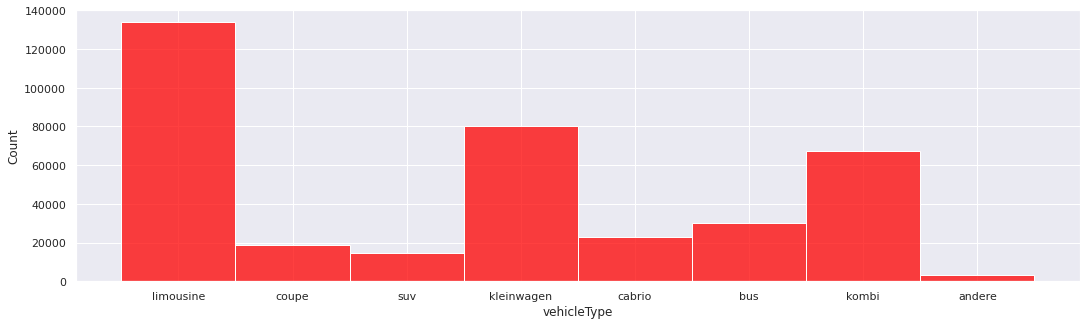

In [200]:
sns.histplot(data=df, x='vehicleType', color='red');

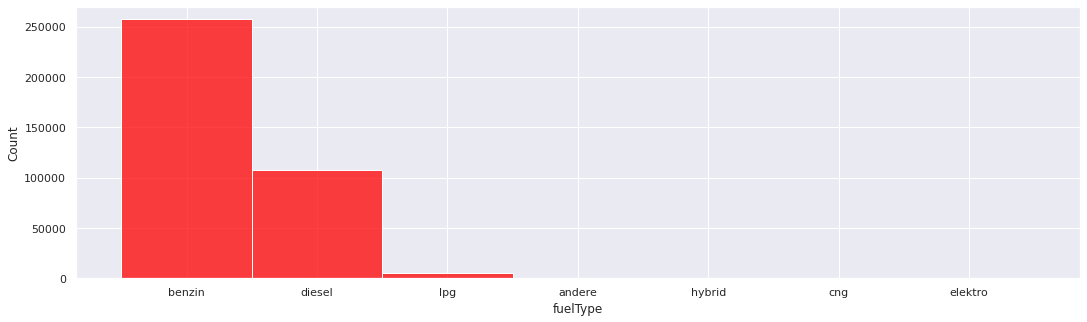

In [201]:
sns.histplot(data=df, x='fuelType', color='red');

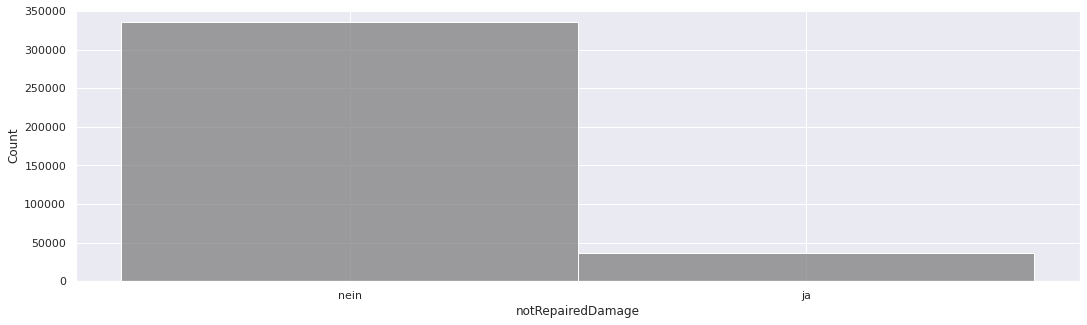

In [202]:
sns.histplot(data=df, x='notRepairedDamage', color='gray');

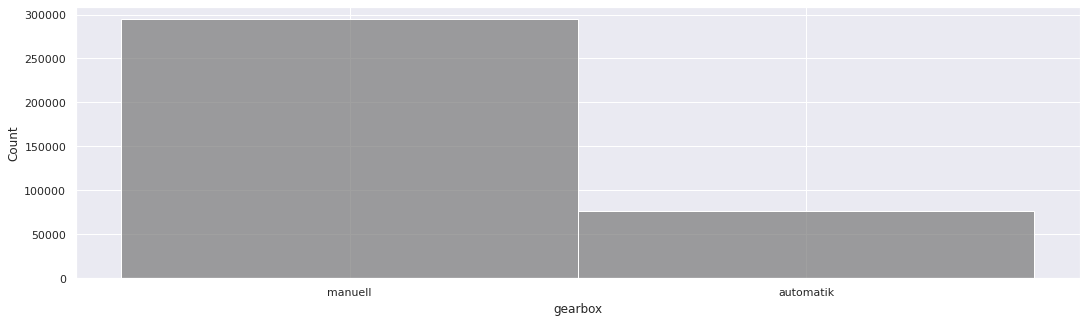

In [203]:
sns.histplot(data=df, x='gearbox', color='gray');

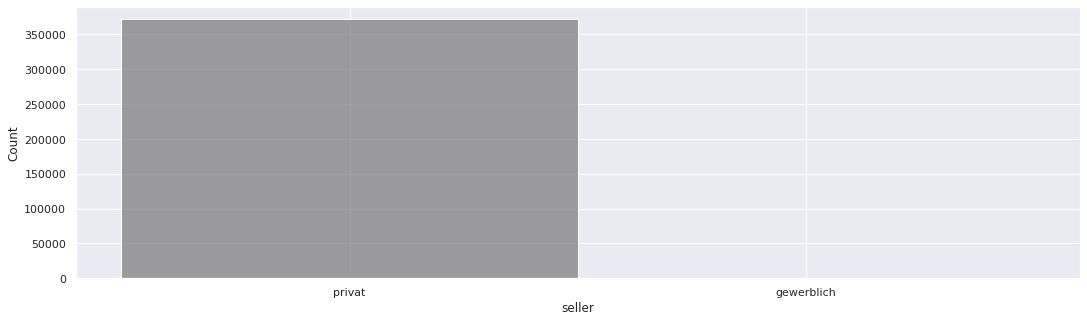

In [204]:
sns.histplot(data=df, x='seller', color='gray');

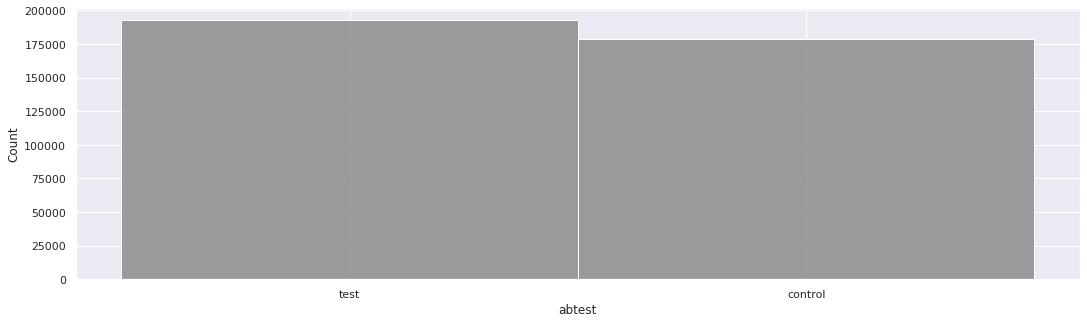

In [205]:
sns.histplot(data=df, x='abtest', color='gray');

### Install Datasist
datasist is a python package providing fast, quick, and an abstracted interface to popular and frequently used functions or techniques relating to data analysis, visualization, data exploration, feature engineering, Computer, NLP, Deep Learning, modeling, model deployment etc.

In [206]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               371524 non-null  string
 1   price                371524 non-null  Int64 
 2   abtest               371524 non-null  string
 3   vehicleType          371524 non-null  string
 4   yearOfRegistration   371524 non-null  Int64 
 5   gearbox              371524 non-null  string
 6   powerPS              371524 non-null  Int64 
 7   model                371524 non-null  string
 8   kilometer            371524 non-null  Int64 
 9   monthOfRegistration  371524 non-null  Int64 
 10  fuelType             371524 non-null  string
 11  brand                371524 non-null  string
 12  notRepairedDamage    371524 non-null  string
dtypes: Int64(5), string(8)
memory usage: 41.5 MB


In [208]:
num_columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']

In [209]:
# Remove outliers
from datasist.structdata import detect_outliers
# ** Parameters **
# data: DataFrame or named Series
# n: the bench mark for the number of allowable outliers in the columns.
# features: Specific columns you want to check for outliers and it accepts only numerical values.
outliers = detect_outliers(df[num_columns], 0, df[num_columns].columns)
df.drop(outliers, inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287552 entries, 0 to 371526
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               287552 non-null  string
 1   price                287552 non-null  Int64 
 2   abtest               287552 non-null  string
 3   vehicleType          287552 non-null  string
 4   yearOfRegistration   287552 non-null  Int64 
 5   gearbox              287552 non-null  string
 6   powerPS              287552 non-null  Int64 
 7   model                287552 non-null  string
 8   kilometer            287552 non-null  Int64 
 9   monthOfRegistration  287552 non-null  Int64 
 10  fuelType             287552 non-null  string
 11  brand                287552 non-null  string
 12  notRepairedDamage    287552 non-null  string
dtypes: Int64(5), string(8)
memory usage: 32.1 MB


## Visualize Histogram of Numerical Columns

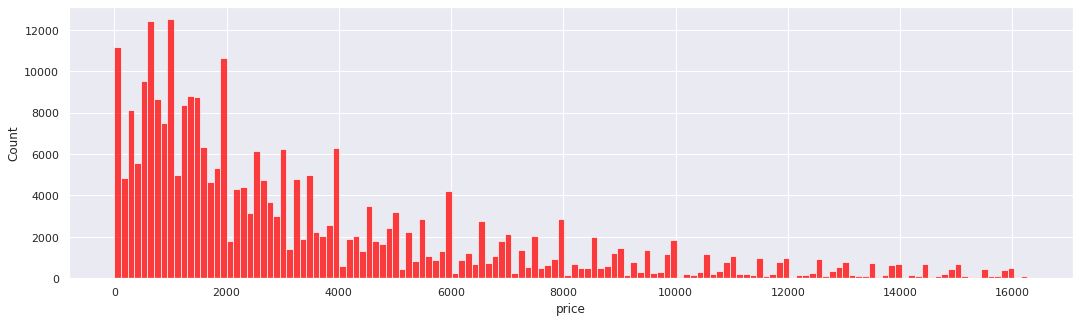

In [211]:
sns.histplot(data=df, x='price', color='red');

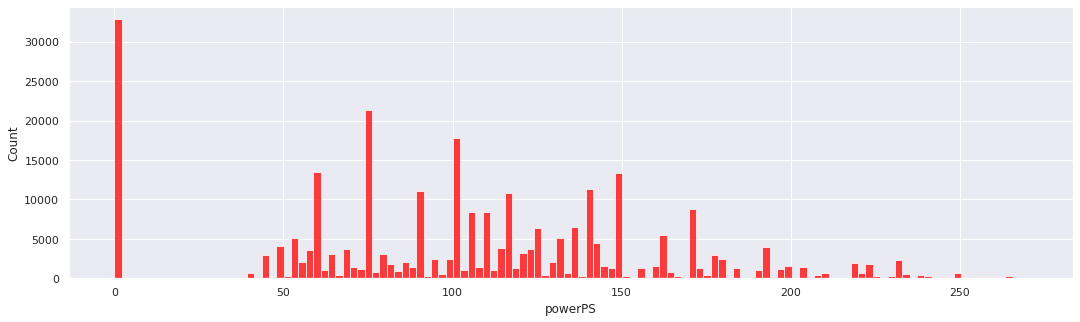

In [212]:
sns.histplot(data=df, x='powerPS', color='red');

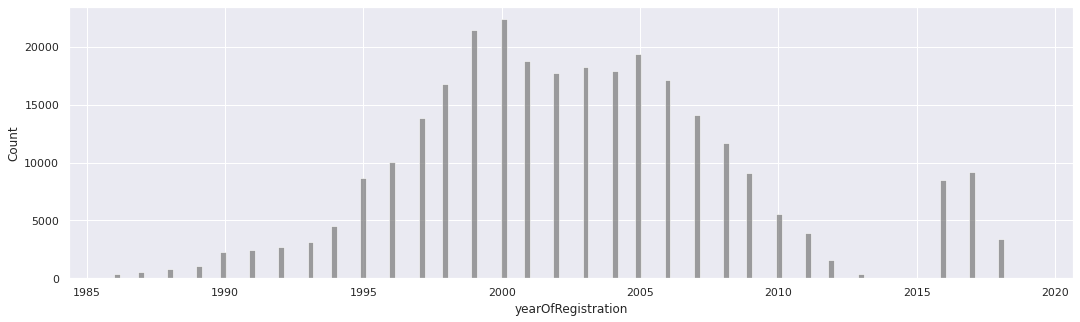

In [213]:
sns.histplot(data=df, x='yearOfRegistration', color='gray');

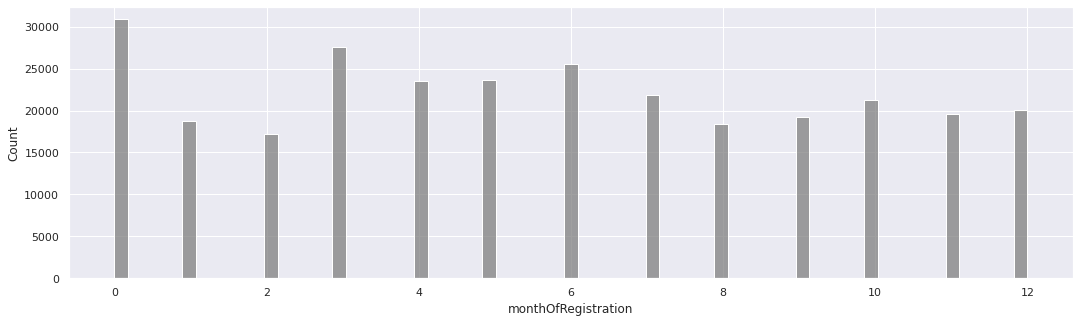

In [214]:
sns.histplot(data=df, x='monthOfRegistration', color='gray');

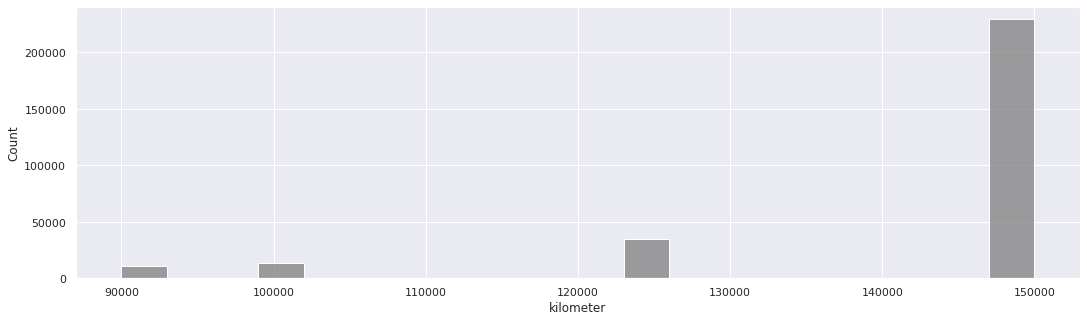

In [215]:
sns.histplot(data=df, x='kilometer', color='gray');

## Data Preprocessing

#### Categorical Data Transformation

In [216]:
# Nominal Transformation (One Hot Encoding)
import category_encoders as catEncoder

categ_data = ['seller', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

BE = catEncoder.BinaryEncoder(cols=categ_data)
df = BE.fit_transform(df)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287552 entries, 0 to 371526
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   seller_0             287552 non-null  int64
 1   seller_1             287552 non-null  int64
 2   price                287552 non-null  Int64
 3   abtest_0             287552 non-null  int64
 4   abtest_1             287552 non-null  int64
 5   vehicleType_0        287552 non-null  int64
 6   vehicleType_1        287552 non-null  int64
 7   vehicleType_2        287552 non-null  int64
 8   vehicleType_3        287552 non-null  int64
 9   yearOfRegistration   287552 non-null  Int64
 10  gearbox_0            287552 non-null  int64
 11  gearbox_1            287552 non-null  int64
 12  powerPS              287552 non-null  Int64
 13  model_0              287552 non-null  int64
 14  model_1              287552 non-null  int64
 15  model_2              287552 non-null  int64
 16  mo

## Data Split

In [218]:
from sklearn.model_selection import train_test_split

X, y = df.drop('price',axis=1), df['price']
y = y.astype('int')

#### Feature Selection

In [219]:
####### no better results #######
# from sklearn.feature_selection import SelectKBest, SelectPercentile
# from sklearn.feature_selection import f_regression

# print(X.shape)

# FeatureSelection = SelectPercentile(score_func= f_regression ,percentile=70)
# X_n = FeatureSelection.fit_transform(X, y)

# print(X_n.shape)

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [222]:
print('Dataset Shape =>', df.shape)
print('X_train Shape =>', X_train.shape)
print('X_test Shape =>', X_test.shape)
print('y_train Shape =>', y_train.shape)
print('y_test Shape =>', y_test.shape)

Dataset Shape => (287552, 34)
X_train Shape => (201286, 33)
X_test Shape => (86266, 33)
y_train Shape => (201286,)
y_test Shape => (86266,)


# Modeling

## 1 - Linear Regression

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

reg = LinearRegression().fit(X_train,(y_train))

print('Train',round((reg.score(X_train, (y_train))*100),2),'%')
print('Test', round((reg.score(X_test, (y_test))*100),2),'%')

print('-------------------------')

y_pred = reg.predict(X_test)

# Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Train 52.99 %
Test 52.75 %
-------------------------
Mean Absolute Error Value is :  1733.5144806522912
Mean Squared Error Value is :  5632180.423280743
Median Squared Error Value is :  1286.0621205259556


In [224]:
lst = y_test.to_numpy()
actual = lst[:50]
bredicted = y_pred[:50]

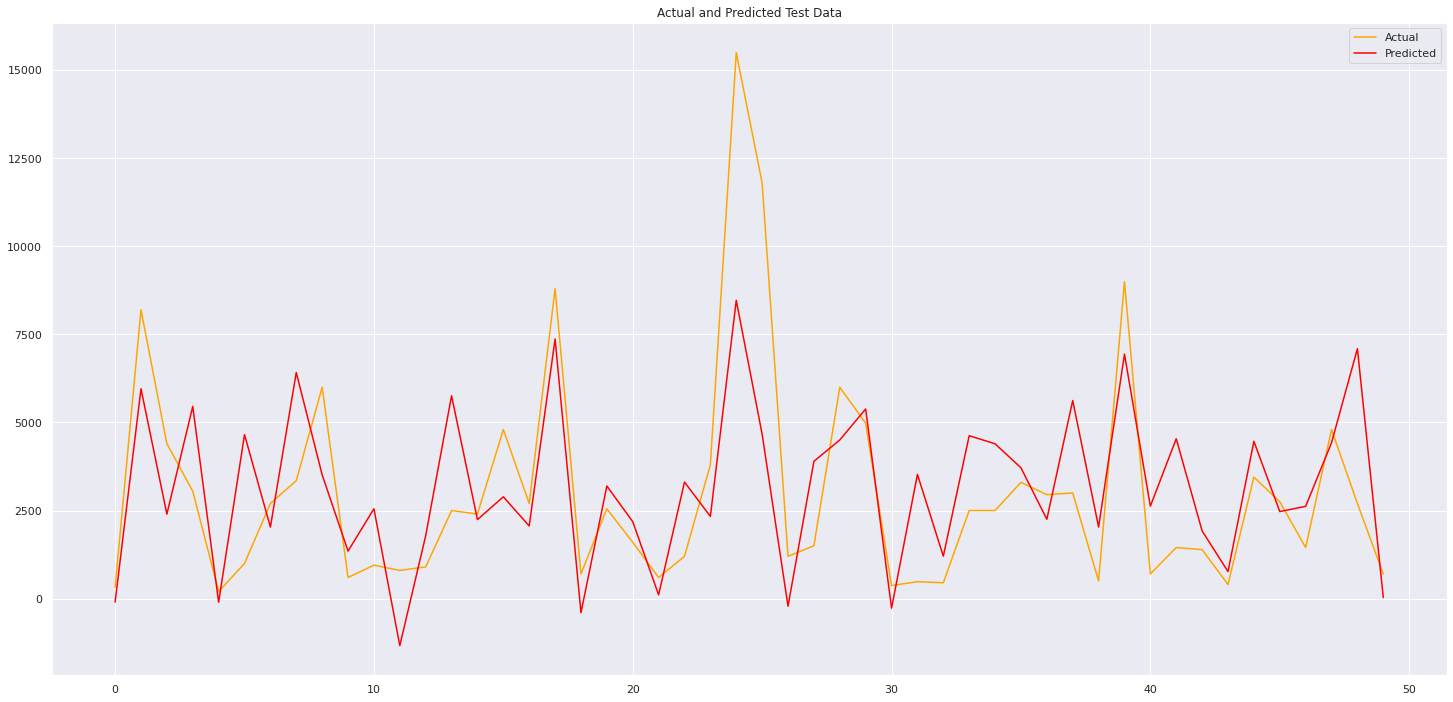

In [225]:
fig, ax = plt.subplots(figsize =(25, 12))
plt.title('Actual and Predicted Test Data')
plt.plot(actual, c='orange', label='Actual')
plt.plot(bredicted, c='red', label='Predicted')
plt.legend()
plt.show()

## 2 - Decision Tree

In [226]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth=14, random_state=50)
DecisionTreeRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Train',round((DecisionTreeRegressorModel.score(X_train, (y_train))*100),2),'%')
print('Test', round((DecisionTreeRegressorModel.score(X_test, (y_test))*100),2),'%')
print('----------------------------------------------------')

y_pred = DecisionTreeRegressorModel.predict(X_test)

# Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Train 85.43 %
Test 76.8 %
----------------------------------------------------
Mean Absolute Error Value is :  1024.6130013920056
Mean Squared Error Value is :  2765290.4181710053
Median Squared Error Value is :  605.5802469135806


In [227]:
lst = y_test.to_numpy()
actual = lst[:50]
bredicted = y_pred[:50]

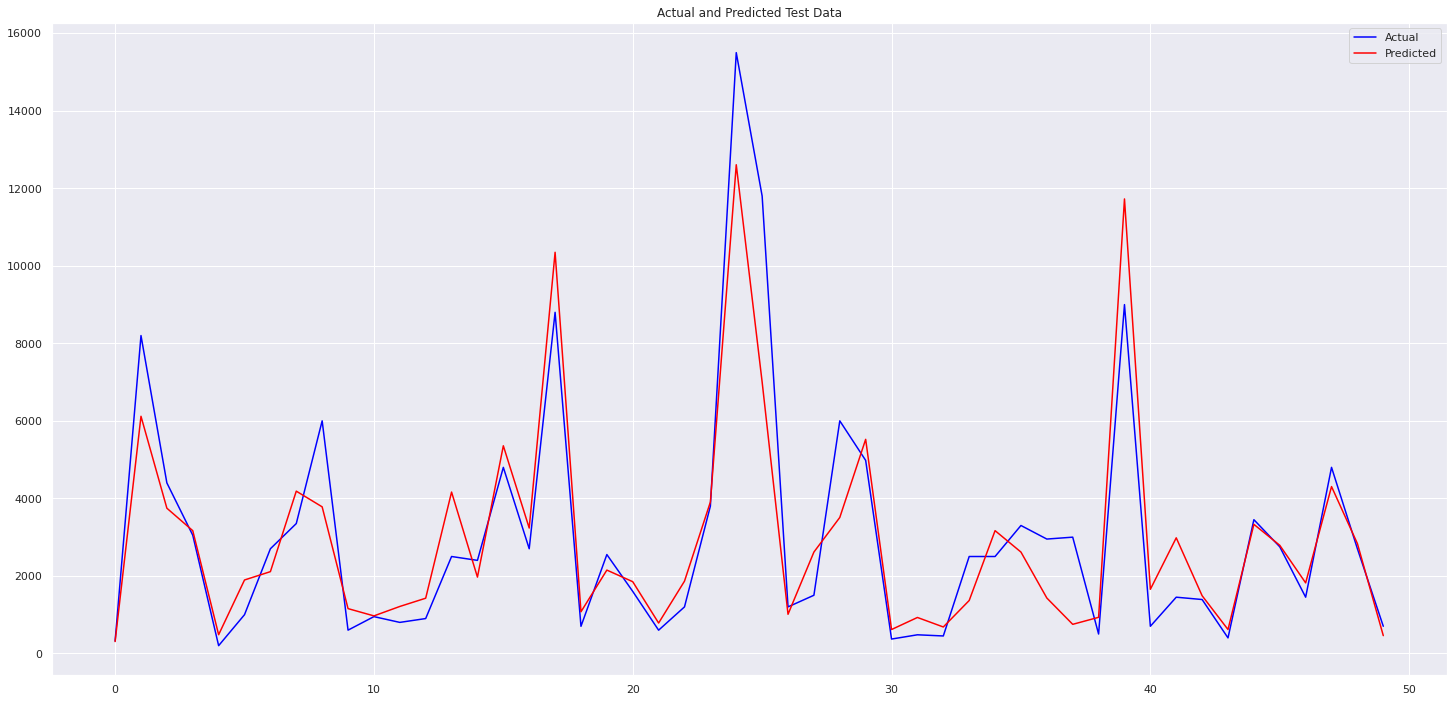

In [228]:
fig, ax = plt.subplots(figsize =(25, 12))
plt.title('Actual and Predicted Test Data')
plt.plot(actual, c='blue', label='Actual')
plt.plot(bredicted, c='red', label='Predicted')
plt.legend()
plt.show()

## 3- Random Forest

In [229]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=110, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Train',round((RandomForestRegressorModel.score(X_train, (y_train))*100),2),'%')
print('Test', round((RandomForestRegressorModel.score(X_test, (y_test))*100),2),'%')
print('----------------------------------------------------')

y_pred = DecisionTreeRegressorModel.predict(X_test)

# Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred)
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Train 96.18 %
Test 81.85 %
----------------------------------------------------
Mean Absolute Error Value is :  1024.6130013920056
Mean Squared Error Value is :  2765290.4181710053
Median Squared Error Value is :  605.5802469135806


In [230]:
lst = y_test.to_numpy()
actual = lst[:50]
bredicted = y_pred[:50]

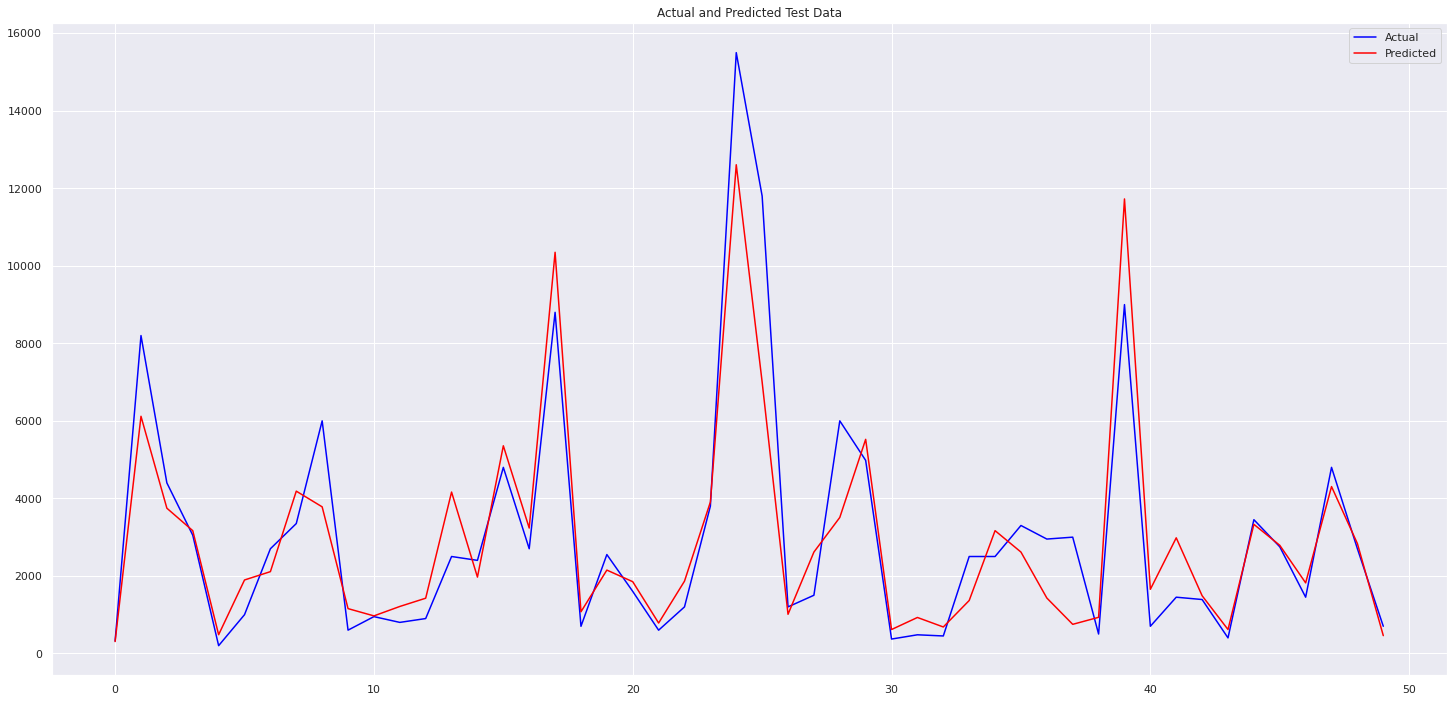

In [231]:
fig, ax = plt.subplots(figsize =(25, 12))
plt.title('Actual and Predicted Test Data')
plt.plot(actual, c='blue', label='Actual')
plt.plot(bredicted, c='red', label='Predicted')
plt.legend()
plt.show()